<h1> Finding Best XI for FIFA World Cup 2018</h1>
<hr>
Once in every 4 years, we celebrate FIFA World Cup.
All priorities change to footbaall, and all predications change to the teams and players that perform in the tournament.

So, it is quite exciting to <b>"Predict the World's Best XI players"</b> in FIFA 2018 using Python for analytics.

In [2]:
#importing dataset and all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('C:/Users/Princy/Desktop/Projects/FullData.csv')
data.head(8)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,90,86,85,76,76,5,15,11,15,6


The 53 columns include the following attributes -
<pre>
1. Name                      27. Vision
2. Nationality               28. Composure
3. National_Position         29. Crossing
4. National_Kit              30. Short_Pass
5. CLub                      31. Long_Pass
6. CLub_Position             32. Acceleration
7. Contract_Enquiry          33. Speed
8. Rating                    34. Stamina
9. Height                    35. Strength
10. Weight                   36. Balance
11. Preferred_Foot           37. Agility
12. Birth_Date               38. Jumping
13. Age                      39. Heading
14. Preferred_Position       40. Shot_Power
15. Work_Rate                41. Finishing
16. Weak_Foot                42. Long_Shots
17. Skill_Moves              43. Curve
18. Ball_Control             44. Freekick_Accuracy
19. Dribbling                45. Penalties
20. Marking                  46. Volleys
21. Sliding_Tackle           47. GK_Positioning
22. Standing_Tackle          48. GK_Diving
23. Aggression               49. GK_Kicking
24. Reactions                50. GK_Handling
25. Attacking_Position       51. GK_Reflexes
26. Interceptions            52. Club_Kit
</pre>

By observation, we found certain redundant and unwanted columns, which we removed by writing the following code -

In [3]:
data.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [4]:
#del data['National_Kit']
del data['Club_Kit']

For the initial analysis, we start by plotting the different nationalities with their count in the dataset.

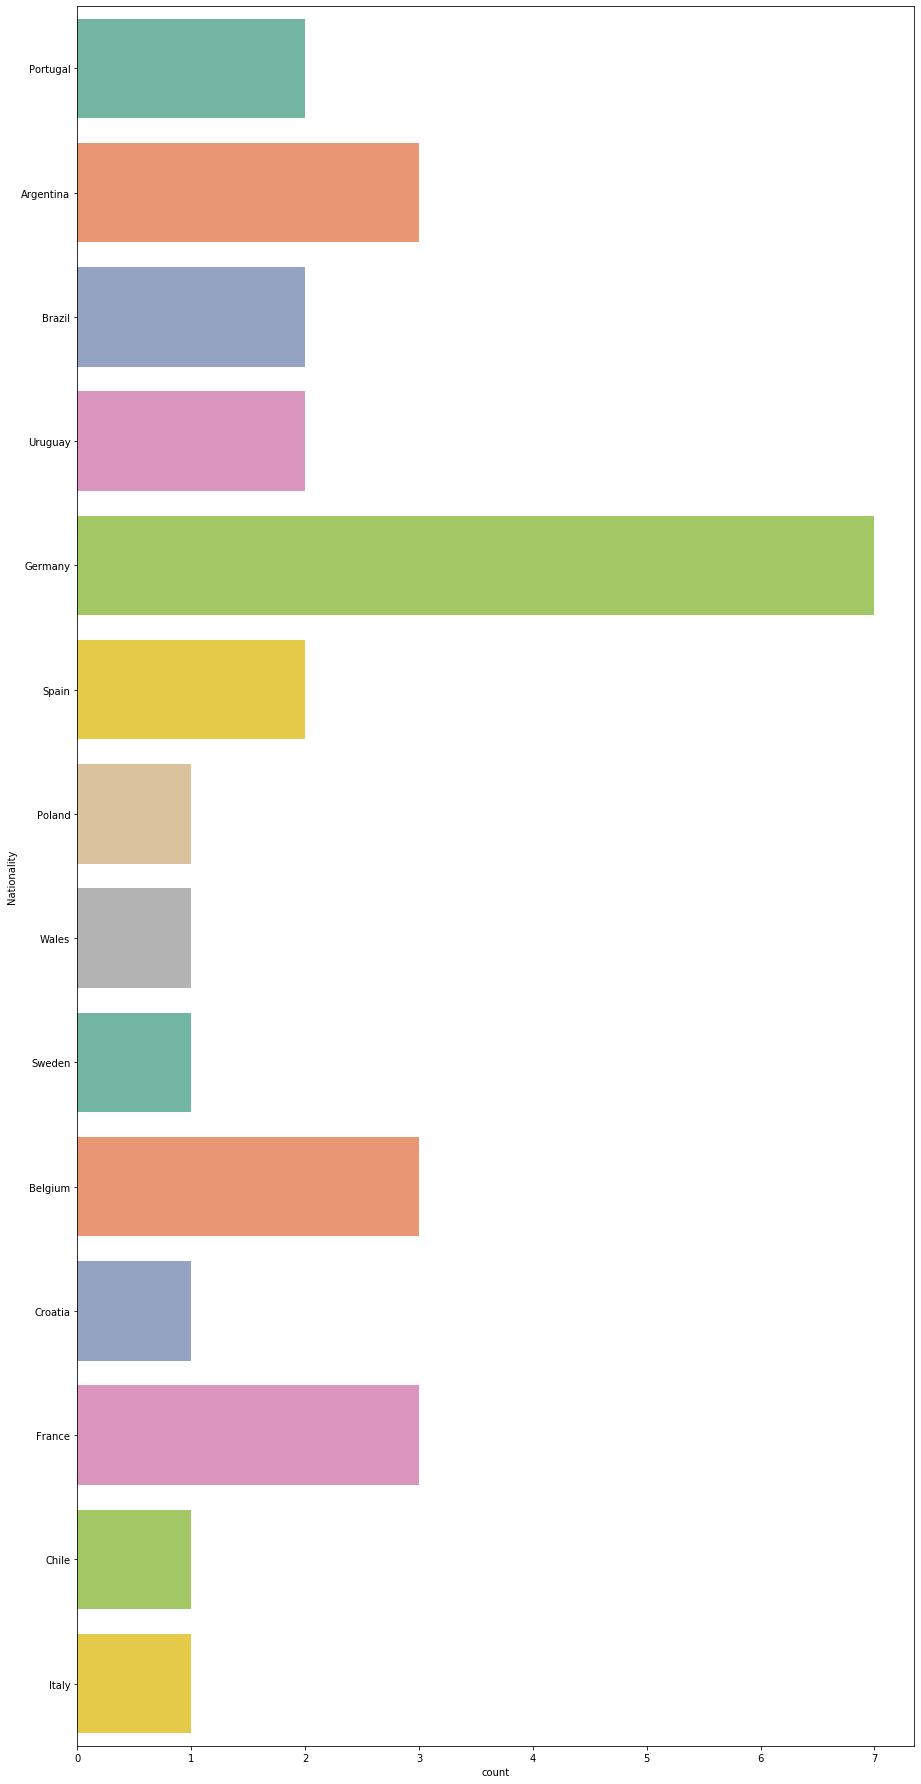

In [5]:
#plotting all nations
plt.figure(figsize = (15, 32))
sns.countplot(y = data.Nationality[:30], palette = "Set2")

The graph allows us to conclude that most of players come from England, Argentina, Spain, France, and Brazil.


Moving on with analysis, we plot different count plots for players' age, preferred_position, rating, club, etc.

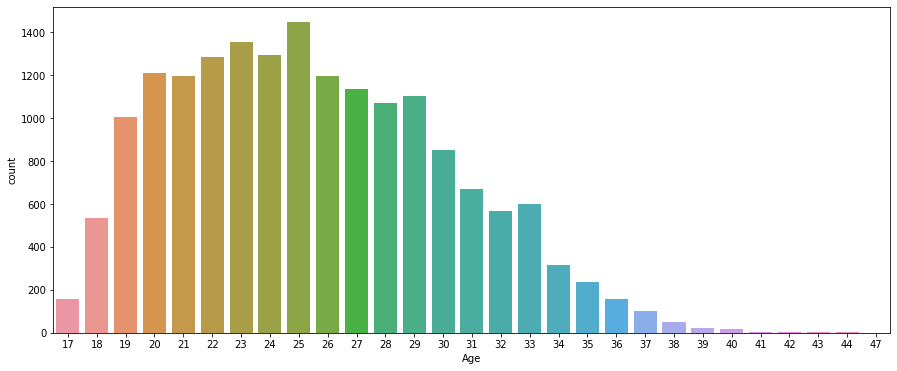

In [6]:
plt.figure(figsize = (15, 6))
sns.countplot(x = 'Age', data = data)

We can infer from the graph that majority of players age between 20 and 29, with most being 25 years of age.

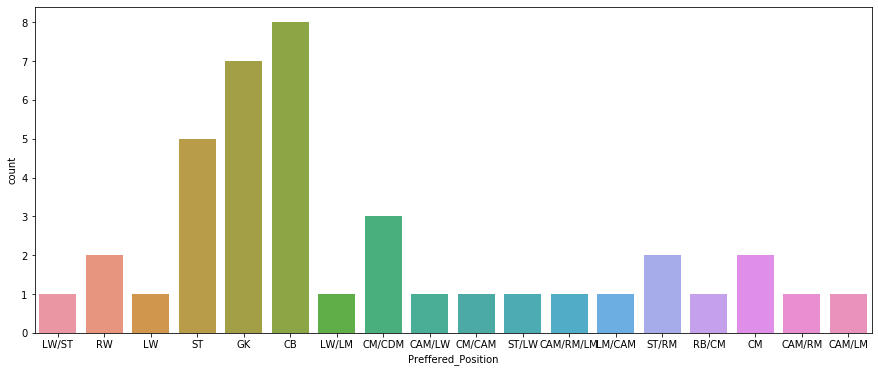

In [7]:
plt.figure(figsize = (15, 6))
sns.countplot(x = "Preffered_Position", data = data[:40])

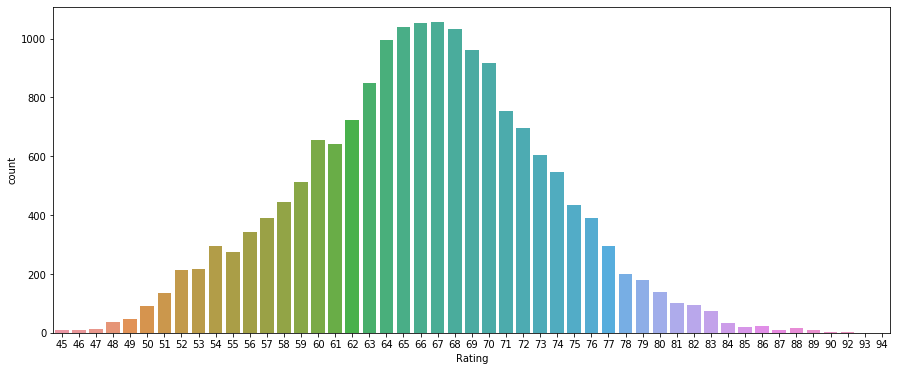

In [8]:
plt.figure(figsize = (15, 6))
sns.countplot(x= 'Rating', data = data)

Most players are rated arounf 60 - 70 / 100 with an average of 67.

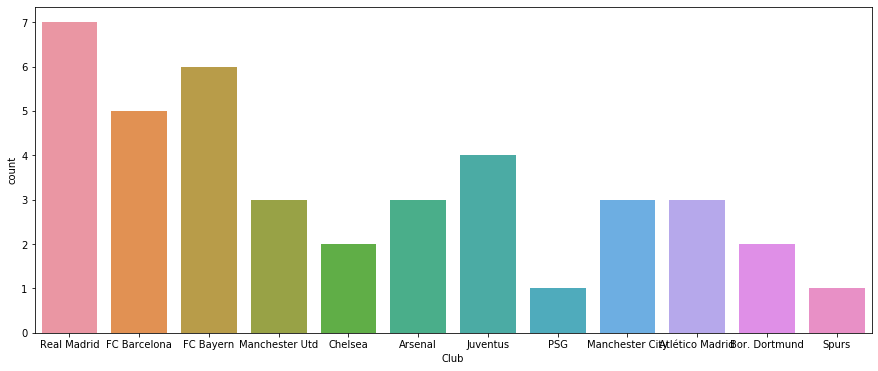

In [9]:
plt.figure(figsize = (15, 6))
sns.countplot(x = 'Club', data = data[:40])

Most players come from Real Madrid football club.

To start with finding the world's best playing XI, we start with considering the 4-3-3 formation for the team, which makes 4 defenders, 3 best mid-fielders, and 3 best attackers.

Firstly, for the goalkeeper, we analyze players based on following parameters -

1. Shot Stopper : one who is good at stopping shots
2. Sweeper : one with strong playing feet for passes.

In [10]:
#weights assigned
a = 0.5
b = 1
c = 2
d = 3

#calculating parameters
data['gk_Shot_Stopper'] = (b*data.Reactions + b*data.Composure + a*data.Speed + a*data.Strength + c*data.Jumping + b*data.GK_Positioning + c*data.GK_Diving + d*data.GK_Reflexes + b*data.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
data['gk_Sweeper'] = (b*data.Reactions + b*data.Composure + b*data.Speed + a*data.Short_Pass + a*data.Long_Pass + b*data.Jumping + b*data.GK_Positioning + b*data.GK_Diving + d*data.GK_Reflexes + b*data.GK_Handling + d*data.GK_Kicking + c*data.Vision)/(2*a + 4*b + 3*c + 2*d)

Text(0, 0.5, 'Shot Stopping Score')

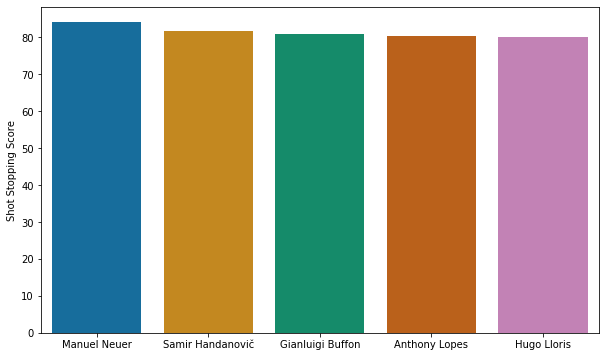

In [11]:
#Plotting these parameters with sequential data
plt.figure(figsize = (10, 6))
sd = data.sort_values('gk_Shot_Stopper', ascending = False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette = "colorblind")
plt.ylabel("Shot Stopping Score")

The plot clearly shows <b>Manuel Neuer</b> as the best goalkeeper for the shot-stopper parameter for judgement.

Text(0, 0.5, 'Sweeping Score')

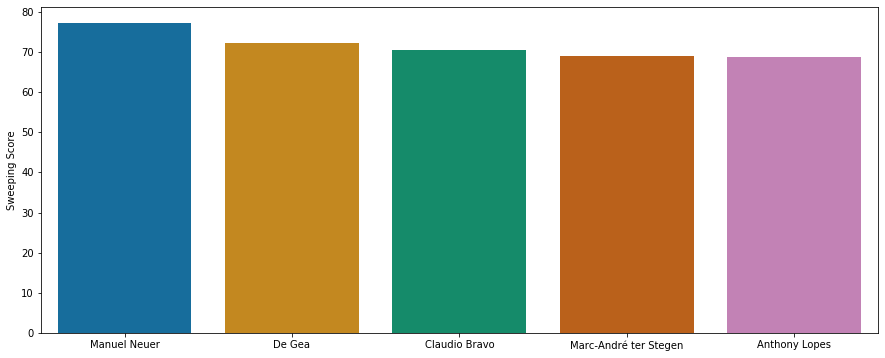

In [12]:
plt.figure(figsize = (15, 6))
sd = data.sort_values('gk_Sweeper', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette = "colorblind")
plt.ylabel("Sweeping Score")

We again find <b>Manuel Neuer</b> as the best goalkeeper even as a Sweeper.
Hence, we can conclude <b>Manuel Neuer</b> as the best choice for the goalkeeper position for the <b>World Cup 2018</b>.

Next, for defenders, we need to find <b> 2 Centre Backs</b> and <b> 2 Wing Backs</b>

In [13]:
#Choosing Defenders
data['df_centre_backs'] = ( d*data.Reactions + c*data.Interceptions + d*data.Sliding_Tackle + d*data.Standing_Tackle + b*data.Vision+ b*data.Composure + b*data.Crossing +a*data.Short_Pass + b*data.Long_Pass+ c*data.Acceleration + b*data.Speed
+ d*data.Stamina + d*data.Jumping + d*data.Heading + b*data.Long_Shots + d*data.Marking + c*data.Aggression)/(6*b + 3*c + 7*d)
data['df_wb_Wing_Backs'] = (b*data.Ball_Control + a*data.Dribbling + a*data.Marking + d*data.Sliding_Tackle + d*data.Standing_Tackle + a*data.Attacking_Position + c*data.Vision + c*data.Crossing + b*data.Short_Pass + c*data.Long_Pass + d*data.Acceleration +d*data.Speed + c*data.Stamina + a*data.Finishing)/(4*a + 2*b + 4*c + 4*d)

Text(0, 0.5, 'LCB Score')

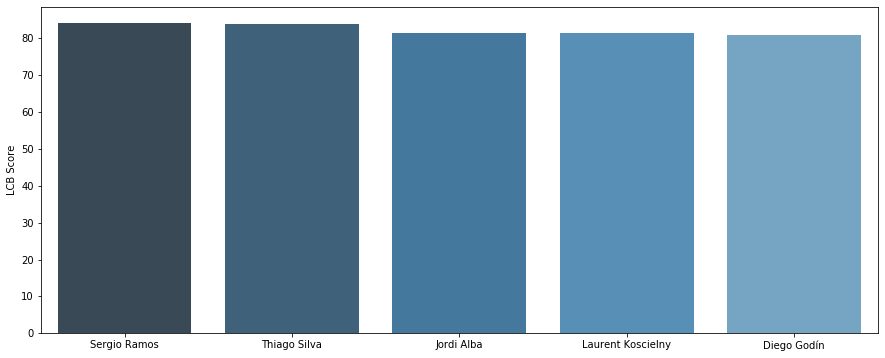

In [14]:
#plotting Left Centre back and Right Center back
plt.figure(figsize = (15, 6))
sd = data[(data['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette = sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

It can be observed that <b>Sergio Ramos</b> is the best <b>Left Center Back Defender</b>.

Text(0, 0.5, 'RCB Score')

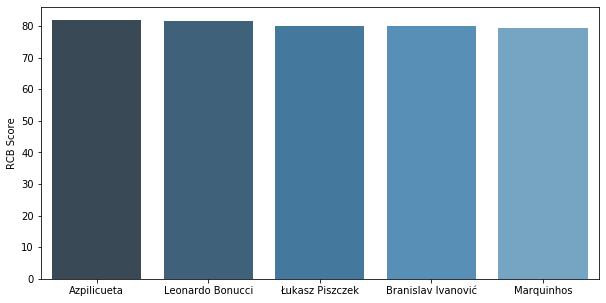

In [15]:
#plotting Right Centre Back
plt.figure(figsize = (10, 5))
sd = data[(data['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette = sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

The plot helps in concluding <b>Azpillicueta</b> as the best <b>Right Centre back Defender</b>.

Moving on to Best <b>Left wing back/ left back</b>-

Text(0, 0.5, 'Left Back Score')

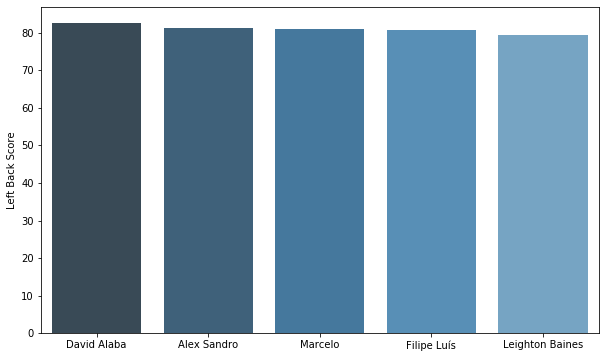

In [16]:
plt.figure(figsize = (10, 6))
sd = data[(data['Club_Position'] == 'LWB') | (data['Club_Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending = False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette = sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

As, </b>David Alaba's</b> team could not qualify in the World Cup 2018, we will pick <b>Alex Sandro</b> as best <b>Left Wing Back Defender</b>.

Text(0, 0.5, 'RIght Back Score')

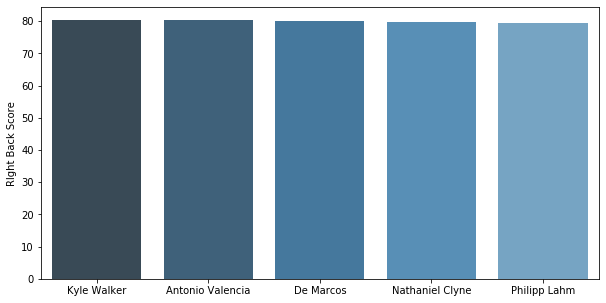

In [17]:
#for RWB
plt.figure(figsize = (10, 5))
sd= data[(data['Club_Position'] == 'RWB') | (data['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending = False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x5, y5, palette = sns.color_palette("Blues_d"))
plt.ylabel("RIght Back Score")

It is evident that <b>Kyle Walker</b> is the best <b> Right Wing Back</b> for the World Cup 2018.

Now, as the game formation is 4-3-3, we choose <b>3 midfielders</b>.
We find them based on <b>Playmaker</b>(one who moves the ball to attacking 3rd from defence to midfield), <b>Beast</b>(one with loads of energy) and <b>Controller</b>(one orchestrating midfield play based on needs) parameters.

In [18]:
#Midfielders' params
data['mf_playmaker'] = (d*data.Ball_Control + d*data.Dribbling + a*data.Marking + d*data.Reactions + d*data.Vision + c*data.Attacking_Position + c*data.Crossing + d*data.Short_Pass + c*data.Long_Pass + c*data.Curve + b*data.Long_Shots + c*data.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
data['mf_beast'] = (d*data.Agility + c*data.Balance + b*data.Jumping + c*data.Strength + d*data.Stamina + a*data.Speed + c*data.Acceleration + d*data.Short_Pass + c*data.Aggression + d*data.Reactions + b*data.Marking + b*data.Standing_Tackle + b*data.Sliding_Tackle + b*data.Interceptions)/(1*a + 5*b + 4*c + 4*d)
data['mf_controller'] = (b*data.Weak_foot + d*data.Ball_Control + a*data.Dribbling + a*data.Marking + a*data.Reactions + c*data.Vision + c*data.Composure + d*data.Short_Pass + d*data.Long_Pass)/(2*c + 3*d + 4*a)

Text(0, 0.5, 'PlayMaker Score')

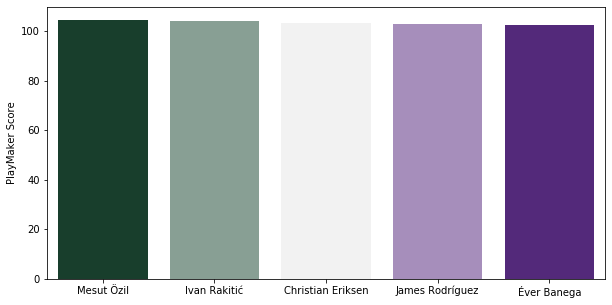

In [19]:
plt.figure(figsize=(10,5))
 
ss = data[(data['Club_Position'] == 'CAM') | (data['Club_Position'] == 'LAM') | (data['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

<b> Mesut Ozil </b> comes out as the best <b>Playmaker</b> for World Cup 2018.

Text(0, 0.5, 'Beast Score')

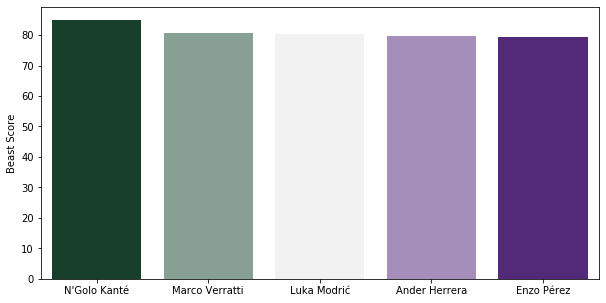

In [20]:
plt.figure(figsize = (10, 5))
ss = data[(data['Club_Position'] == 'RCM') | (data['Club_Position'] == 'RM')].sort_values('mf_beast', ascending = False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette = sns.diverging_palette(145, 280, s = 85, l = 25, n = 5))
plt.ylabel("Beast Score")

By analysis, we find <b>N' Golo Kante</b> as best <b>Beast/Right Centre Midfielder</b>.

Text(0, 0.5, 'Controller Score')

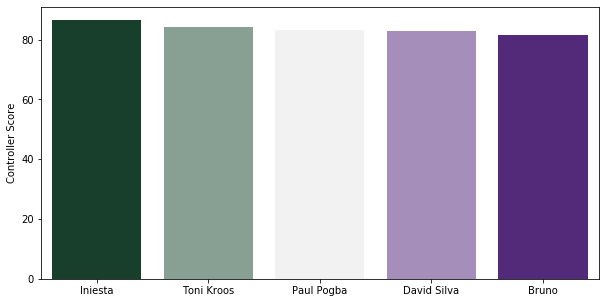

In [21]:
plt.figure(figsize = (10, 5))
ss = data[(data['Club_Position'] == 'LCM') | (data['Club_Position'] == 'LM')].sort_values('mf_controller', ascending = False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette = sns.diverging_palette(145, 280, s = 85, l = 25, n=5))
plt.ylabel("Controller Score")

<b>Iniesta</b> comes as the best <b>controller/Left Central Modfielder</b>.

Finally, for finding the best attacker, we analyze <b>Attacking Left Wing</b>(one attacking from the left flank), <b>Attacking Right Wing</b>(one attacking from the right flank) and <b>Striker</b>(one attacking from the center) as parameters.

In [22]:
#calculating parameters
data['att_left_wing'] = (c*data.Weak_foot + c*data.Ball_Control + c*data.Dribbling + c*data.Speed + d*data.Acceleration + b*data.Vision + c*data.Crossing + b*data.Short_Pass + b*data.Long_Pass + b*data.Aggression + b*data.Agility + a*data.Curve + c*data.Long_Shots + b*data.Freekick_Accuracy + d*data.Finishing)/(a + 6*b + 6*c + 2*d)
data['att_right_wing'] = (c*data.Weak_foot + c*data.Ball_Control + c*data.Dribbling + c*data.Speed + d*data.Acceleration + b*data.Vision + c*data.Crossing + b*data.Short_Pass + b*data.Long_Pass + b*data.Aggression + b*data.Agility + a*data.Curve + c*data.Long_Shots + b*data.Freekick_Accuracy + d*data.Finishing)/(a + 6*b + 6*c + 2*d)
data['att_striker'] = (b*data.Weak_foot + b*data.Ball_Control + a*data.Vision + b*data.Aggression + b*data.Agility + a*data.Curve + a*data.Long_Shots + d*data.Balance + d*data.Finishing + d*data.Heading + c*data.Jumping + c*data.Dribbling)/(3*a + 4*b + 2*c + 3*d)


In [23]:
plt.figure(figsize = (10, 5))
ss = data[(data['Club_Position'] == 'LW') | (data['Club_Position'] == 'LM') | (data['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending = False)[:5]


<Figure size 720x360 with 0 Axes>

As guessed, <b>Cristiano Ronaldo</b> is the best <b>Left Wing Attacker</b> for the World Cup 2018.



Text(0, 0.5, 'Striker')

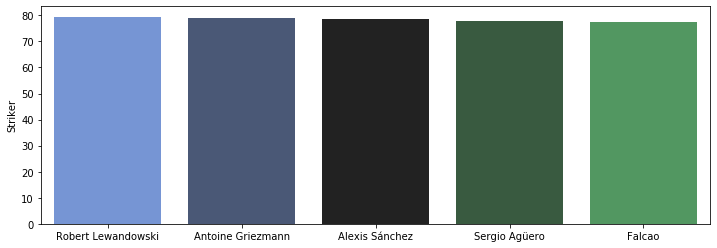

In [32]:
#plotting RW
plt.figure(figsize = (12, 4))
ss = data[(data['Club_Position'] == 'ST') | (data['Club_Position'] == 'LS') | (data['Club_Position'] == 'RS') | (data['Club_Position'] == 'CF')].sort_values('att_striker', ascending = False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette =sns.diverging_palette(255, 133, l= 60, n = 5, center = 'dark'))
plt.ylabel("Striker")

<b>Robert Lewandowski</b> is the best <b>Right Wing Attacker</b> for the World Cup 2018.

<b><h3>Conclusion</h3></b>
<h3><hr></h3>

The below representation clearly shows the World's Best Playing XI for World Cup 2018 in the ,<b>4-3-3</b> lineup -
<br>
<br>
<br>


<pre>
                                            <b>Robert Lewandowski</b>
    
    
    
            <b>Cristiano Ronaldo</b>                                                  <b>Lionel Messi</b>
        
        
        
                                                <b>Mesut Ozil</b>

            <b>Andres Iniesta</b>                                                      <b>N'Golo Kante</b>
            
            

        <b>Alex Sandro</b>                                                                   <b>Kyle Walker</b>
        

                            <b>Sergio Ramos</b>                        <b>Cesar Azpilicueta</b>

            
                                               <b>Manuel Neuer</b>
